# Tarea 6

## Modelo exponencial para el COVID-19

In [1]:
# Importamos las bibliotecas que vamos a usar
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# Leemos los datos desde el link del github para no tener que estarlos 
link = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
covid_paises = pd.read_csv(link)

In [2]:
covid_paises.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,120,170,174,237,273,281,299,349,367,423
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,212,223,243,259,277,304,333,361,377,383
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,511,584,716,847,986,1171,1251,1320,1423,1468
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,334,370,376,390,428,439,466,501,525,545
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,7,7,7,8,8,8,10,14,16,17


In [3]:
# Buscamos los indices de los países para graficar el crecimiento de los casos confirmados
# y los guardamos en el diccionario, en el que las llaves son los países y los valores son 
# sus renglones en el csv del github, pero los inicializamos todos en cero y en el ciclo for
# modificamos los valores de cada llave

paises = {'Mexico':0,'Cuba':0,'Guatemala':0,'Peru':0,'Argentina':0,'Colombia':0,'Costa Rica':0,'Panama':0,'Paraguay':0,'Uruguay':0}
ciudades = ['Mexico','Cuba','Guatemala','Peru','Argentina','Colombia','Costa Rica','Panama','Paraguay','Uruguay']

for i in range(len(covid_paises['Country/Region'])):
    if covid_paises['Country/Region'][i] == 'Mexico':
            print("Índice de México:{0}".format(i))
            paises['Mexico'] = i
    if covid_paises['Country/Region'][i] == 'Cuba':
            print("Índice de Cuba:{0}".format(i))
            paises['Cuba'] = i
    if covid_paises['Country/Region'][i] == 'Guatemala':
            print("Índice de Guatemala:{0}".format(i))
            paises['Guatemala'] = i
    if covid_paises['Country/Region'][i] == 'Peru':
            print("Índice de Peru:{0}".format(i))
            paises['Peru'] = i
    if covid_paises['Country/Region'][i] == 'Argentina':
            print("Índice de Argentina:{0}".format(i))
            paises['Argentina'] = i
    if covid_paises['Country/Region'][i] == 'Colombia':
            print("Índice de Colombia:{0}".format(i))
            paises['Colombia'] = i
    if covid_paises['Country/Region'][i] == 'Costa Rica':
            print("Índice de Costa Rica:{0}".format(i))
            paises['Costa Rica'] = i
    if covid_paises['Country/Region'][i] == 'Panama':
            print("Índice de Panama:{0}".format(i))
            paises['Panama'] = i
    if covid_paises['Country/Region'][i] == 'Paraguay':
            print("Índice de Paraguay:{0}".format(i))
            paises['Paraguay'] = i
    if covid_paises['Country/Region'][i] == 'Uruguay':
            print("Índice de Uruguay:{0}".format(i))
            paises['Uruguay'] = i
    

Índice de Argentina:6
Índice de Colombia:82
Índice de Costa Rica:85
Índice de Cuba:89
Índice de Guatemala:123
Índice de México:158
Índice de Panama:178
Índice de Paraguay:180
Índice de Peru:181
Índice de Uruguay:224


Notamos que en estos países, su información se encuentra en un solo renglón. Ponemos la información de cada país en un origen común, comenzando desde que hay al menos un caso confirmado:

In [4]:
# Usamos el diccionario de los paises y la lista que contiene el nombre de los paises 
# para obtener una lista, en la que cada entrada se incluyen los casos confirmados por 
# país desde el día en el que al menos hubo un primer caso confirmado de covid-19
conf_paises_10 = []

for pais in ciudades:
    indice = paises[pais]
    pais = covid_paises.loc[[indice]]
    confirmados = pais.values[0][4:]
    conf_paises_10.append(confirmados[confirmados>0])

In [5]:
conf_paises_10

[array([1, 4, 5, 5, 5, 5, 5, 6, 6, 7, 7, 7, 8, 12, 12, 26, 41, 53, 82, 93,
        118, 164, 203, 251, 316, 367, 405, 475, 585, 717, 848, 993, 1094,
        1215, 1378, 1510, 1688, 1890, 2143, 2439], dtype=object),
 array([3, 4, 4, 4, 4, 5, 7, 11, 16, 21, 35, 40, 48, 57, 67, 80, 119, 139,
        170, 186, 212, 233, 269, 288, 320, 350, 396], dtype=object),
 array([1, 1, 2, 6, 6, 9, 12, 17, 19, 20, 21, 24, 25, 28, 34, 34, 36, 38,
        39, 47, 50, 61, 61, 70, 77], dtype=object),
 array([1, 1, 6, 7, 11, 11, 15, 28, 38, 43, 86, 117, 145, 234, 234, 318,
        363, 395, 416, 480, 580, 635, 671, 852, 950, 1065, 1323, 1414,
        1595, 1746, 2281, 2561, 2954], dtype=object),
 array([1, 1, 1, 2, 8, 12, 12, 17, 19, 19, 31, 34, 45, 56, 68, 79, 97, 128,
        158, 266, 301, 387, 387, 502, 589, 690, 745, 820, 1054, 1054, 1133,
        1265, 1451, 1451, 1554, 1628], dtype=object),
 array([1, 1, 1, 1, 3, 9, 9, 13, 22, 34, 54, 65, 93, 102, 128, 196, 231,
        277, 378, 470, 491, 539, 608, 

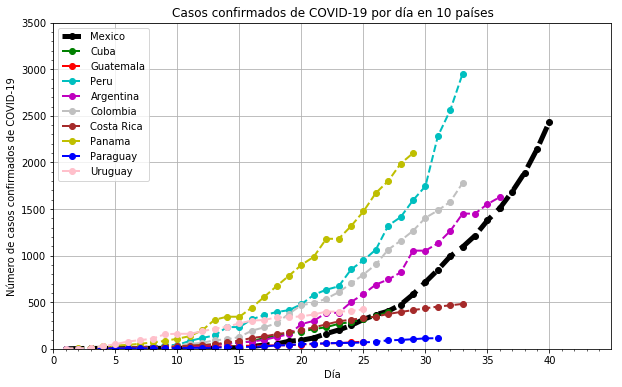

In [28]:
# Graficamos los datos completos

# Ponemos de color negro a México para resaltarlo
colores = ['k','g','r','c','m','silver','brown','y','b','pink']

dias = np.arange(0,45,5)

fig = plt.figure(figsize=(10,6))


for i in range(len(conf_paises_10)):
    # Resaltamos a México con líneas más gruesas
    if i==0:
        plt.plot([conf for conf in range(1,len(conf_paises_10[i])+1)], conf_paises_10[i], 'go--', color = colores[i], lw=5, label =ciudades[i])
    else:
        plt.plot([conf for conf in range(1,len(conf_paises_10[i])+1)], conf_paises_10[i], 'go--', color = colores[i], lw=2, label =ciudades[i])
plt.xlim([1,45])
plt.ylim([1,3500])
plt.title("Casos confirmados de COVID-19 por día en 10 países")
plt.xlabel("Día")
plt.ylabel("Número de casos confirmados de COVID-19")
plt.legend(loc='best')
plt.grid()
plt.yscale('linear')
plt.xticks(ticks=dias,labels=dias)
plt.minorticks_on()
plt.show()


Elegimos México y ajustamos el modelo descrito a continuación. Calculamos $(E + 1)$ usando la información publicada por la Johns Hopkins CSSE. Determinamos a partir de cuántos casos el modelo
ajusta mejor durante los primeros días:

* $I_{n}:$ Cantidad de confirmados de COVID-19 en el día $n$.
* $I_{n+1}:$ Cantidad de confirmados de COVID-19 en el día $n+1$.
* $\Delta I_{n}:$ Incremento en la cantidad de confirmados de COVID-19 del día $n$ al día $n+1$.

Suponiendo que la cantidad de casos confirmados de COVID-19 $\Delta I_{n}$ para el día $n+1$ es proporcional a la cantidad de confirmados del día de hoy $n$ entonces tenemos las siguinte relaciones y fórmulas:

$$ \Delta I_{n} = E*I_{n}$$

$$ E = \frac{\Delta I_{n}}{I_{n}}$$
$$ \Delta I_{n}= I_{n+1}-I_{n}$$ 

$$ I_{n+1} = I_{n}*(E+1)$$

Por lo tanto, el factor **$E$** es el valor con el obtendremos nuestras predicciones de nuevos casos de COVID-19 en los próximos días. Esto parece ser una Cadena DE Markov.

In [7]:
conf_mex = conf_paises_10[0].copy()

In [8]:
# Como escogimos México, sabemos que en la lista de conf_paises_10 están sus casos confirmados 
# desde el primer caso de COVID-19; por lo que vamos a hacer las predicciones para este país.

# Es por eso que primero calculamos la constante E para los días en los que ya tenemos el 
# numero correcto de casos confirmados (Empezamos desde el segundo día). Guardamos esa 
# constante E en una lista

E = []

for i in range(1,len(conf_mex)):
    E.append(conf_mex[i]/conf_mex[i-1] - 1)

In [9]:
len(E)

39

In [10]:
sum(E)

10.56947122651855

In [11]:
# Como  tenemos 39 valores de E, realizamos el promedio de estas y el resultado  
# que obtendremos es la que usaremos para las predicciones:

constante_E = sum(E)/len(E)

In [18]:
# Calculamos la predicción hasta el último día en que está actualizado el csv del github 
# y realizamos la prediccion con la constante_E que acabamos de calcular; guardando
# dichas predicciones en una lista para usarlas posteriormente

conf_mex_pred = []

# Hacemos las predicciones usando la constante_E desde el segundo día con casos confirmados hasta
# los próximos 20 días (los 20 días posteriores al día en que subí el código a github)
for i in range(len(conf_mex)):
    if i == 0:
        conf_mex_pred.append(1)
    else:
        conf_mex_pred.append(conf_mex[i-1]*(constante_E+1))

for j in range(len(conf_mex)-1,len(conf_mex)+19):
    conf_mex_pred.append(conf_mex_pred[j]*(constante_E+1))
        


In [19]:
len(conf_mex_pred)

60

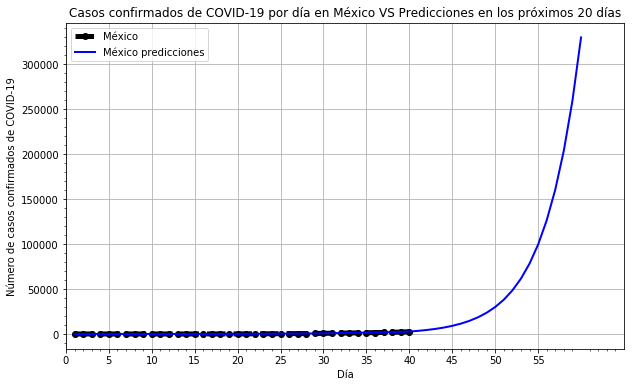

In [21]:
# Graficamos los datos completos, empezando las predicciones desde el día cero hasta 20 días después al de hoy;
# comparando en una misma gráfica las predicciones de los casos confirmados con los casos confirmados reales


dias = np.arange(0,60,5)

fig = plt.figure(figsize=(10,6))

plt.plot([conf for conf in range(1,len(conf_mex)+1)], conf_mex, 'go--', color = 'k', lw=5, label ='México')
plt.plot([conf for conf in range(1,len(conf_mex_pred)+1)], conf_mex_pred, '-', color = 'b', lw=2, label = 'México predicciones')

plt.xlim([1,65])
plt.title("Casos confirmados de COVID-19 por día en México VS Predicciones en los próximos 20 días")
plt.xlabel("Día")
plt.ylabel("Número de casos confirmados de COVID-19")
plt.legend(loc='best')
plt.grid()
plt.yscale('linear')
plt.xticks(ticks=dias,labels=dias)
plt.minorticks_on()
plt.show()

In [24]:
# Como extra, realizo la misma idea para predecir futuros casos confirmados en el estado de Hidalgo

# Casos confirmados en Hidalgo desde el día uno hasta el día de hoy 07 de Abril del 2020
conf_hgo= [2,2,3,5,7,7,7,12,12,13,17,17,19,21,26,30,32, 34, 35, 41]


E_hidalgo = []

for i in range(1,len(conf_hgo)):
    E_hidalgo.append(conf_hgo[i]/conf_hgo[i-1] - 1)

constante_E_hidalgo = sum(E_hidalgo)/len(E_hidalgo)

conf_hgo_pred = []

# Hacemos las predicciones usando la constante_E_hidalgo desde el segundo día con casos 
# confirmados hasta los próximos 20 días 
for i in range(len(conf_hgo)):
    if i == 0:
        conf_hgo_pred.append(2)
    else:
        conf_hgo_pred.append(conf_hgo_pred[i-1]*(constante_E_hidalgo+1))

for j in range(len(conf_hgo)-1,len(conf_hgo)+20):
    conf_hgo_pred.append(conf_hgo_pred[j]*(constante_E_hidalgo+1))
        

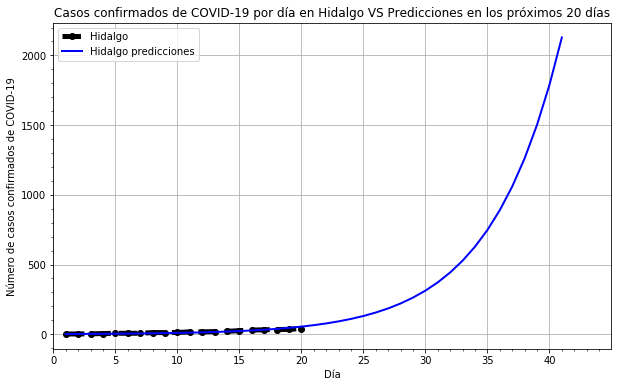

In [26]:

# Graficamos los datos completos

# Ponemos de color negro a México para resaltarlo

dias = np.arange(0,45,5)

fig = plt.figure(figsize=(10,6))

plt.plot([conf for conf in range(1,len(conf_hgo)+1)], conf_hgo, 'go--', color = 'k', lw=5, label ='Hidalgo')
plt.plot([conf for conf in range(1,len(conf_hgo_pred)+1)], conf_hgo_pred, '-', color = 'b', lw=2, label = 'Hidalgo predicciones')

plt.xlim([1,45])
plt.title("Casos confirmados de COVID-19 por día en Hidalgo VS Predicciones en los próximos 20 días")
plt.xlabel("Día")
plt.ylabel("Número de casos confirmados de COVID-19")
plt.legend(loc='best')
plt.grid()
plt.yscale('linear')
plt.xticks(ticks=dias,labels=dias)
plt.minorticks_on()
plt.show()